##                                            Project Code - PRCP-1000-Portuguese Bank

## BUSINESS CASE :- Create a predictive model which will help the bank marketing team to know which customer will buy the product.

# 1 . Python Implementation

In [20]:
import pandas as pd                                                   # import pandas Library for data reading
import numpy as np                                                    # import numpy for numerical calculation
import seaborn as sns                                                 # import seaborn library for data visualisation
from sklearn.preprocessing import LabelEncoder
import warnings                                                       # import warnings is used to manage warning messages
import matplotlib.pyplot as plt                                       # import matplotlib for data visualization                                                         # import pickle for save and load objects
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("bank-additional-full.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 2 . Domain Analysis and Basic Checks

- **Age** :- Age of Bank Customers.
- **Job** - What Type of job do Bank Customer.
- **Marital** - Maritial Status.
- **Education** - Education / Highest Qualification.
- **Default** - Customer has defaulted or not(make mistakes or not able to return loan).
- **housing** - Customer has House loan or Not.
- **loan** - customer has Personal Loan or Not.
- **Contact** - Communication Type.
- **Month** - Last Contact Month of the year.
- **day_of_week** - last contact day of week.
- **Duration** - last contact duration in seconds .
- **campaign** - number of contacts performed during this campaign and for this client.
- **pdays** - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).
- **previous** - number of contacts performed before this campaign and for this client.
- **poutcome** - outcome of the previous marketing Campaign.
- **emp.var.rate**- employment variation rate - quarterly indicator.
- **cons.price.idx** - consumer price index - monthly indicator.
- **cons.conf.idx** - consumer confidence index - monthly indicator.
- **euribor3m** - euribor 3 month rate - daily indicator .
- **nr.employed** - number of employees - quarterly indicator.
- **y** - the client has subscribed a term deposit or not.

In [24]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [26]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [28]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [29]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# 3 . EDA : Exploratory Data Analysis

#### Univariate Analysis

In [32]:
# Checking Distributions

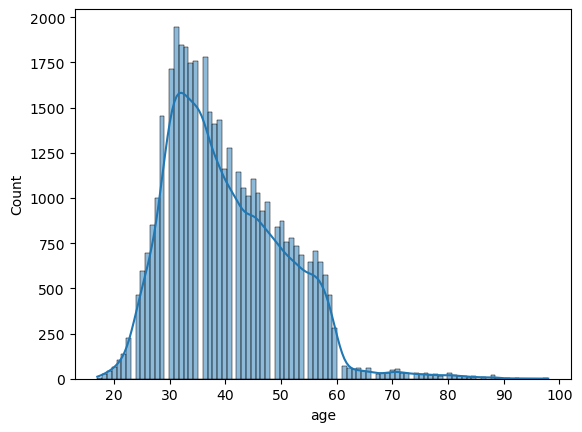

In [33]:
sns.histplot(x=df.age,kde=True)
plt.show()

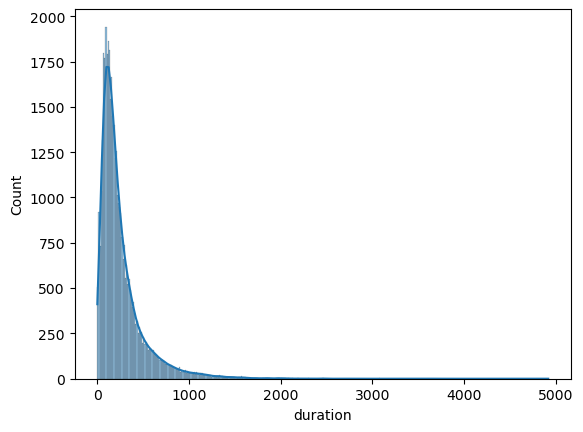

In [34]:
sns.histplot(x=df.duration,kde=True)
plt.show()

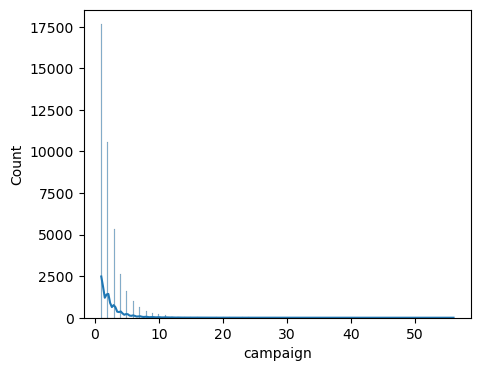

In [35]:
plt.figure(figsize=(5,4))
sns.histplot(x=df.campaign,kde=True)
plt.show()

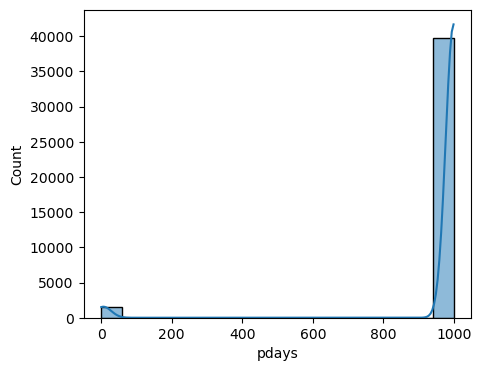

In [36]:
plt.figure(figsize=(5,4))
sns.histplot(x=df.pdays,kde=True)
plt.show()

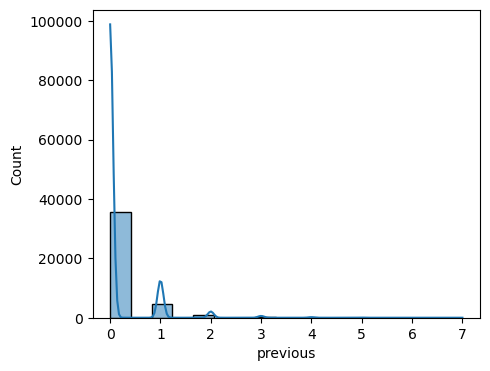

In [37]:
plt.figure(figsize=(5,4))
sns.histplot(x=df.previous,kde=True)
plt.show()

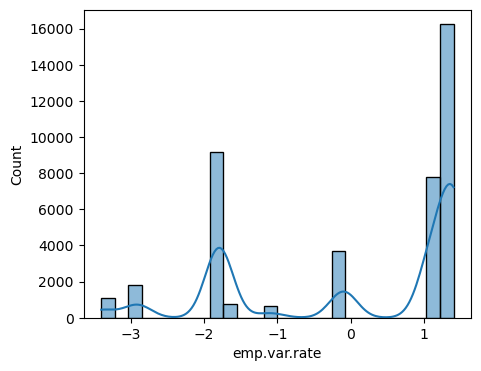

In [38]:
plt.figure(figsize=(5,4))
sns.histplot(x='emp.var.rate',data=df,kde=True)
plt.show()

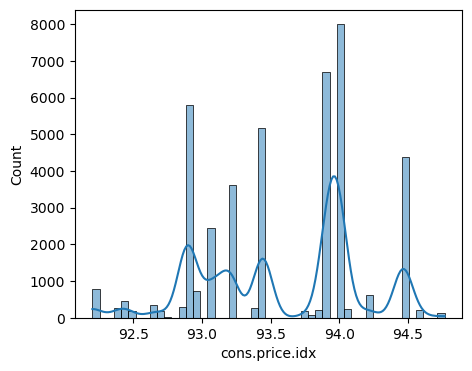

In [39]:
plt.figure(figsize=(5,4))
sns.histplot(x='cons.price.idx',data=df,kde=True)
plt.show()

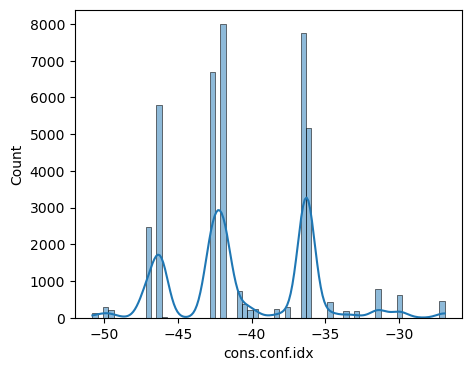

In [40]:
plt.figure(figsize=(5,4))
sns.histplot(x='cons.conf.idx',data=df,kde=True)
plt.show()

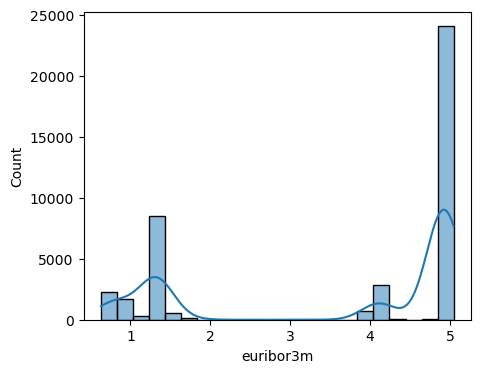

In [41]:
plt.figure(figsize=(5,4))
sns.histplot(x='euribor3m',data=df,kde=True)
plt.show()

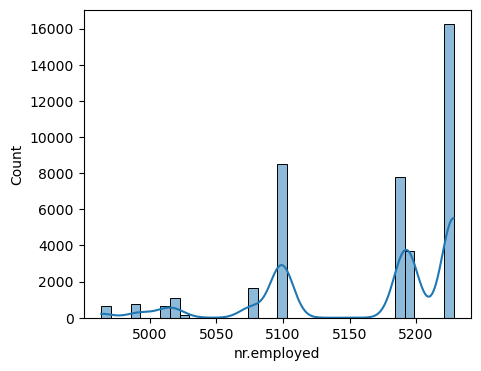

In [42]:
plt.figure(figsize=(5,4))
sns.histplot(x='nr.employed',data=df,kde=True)
plt.show()

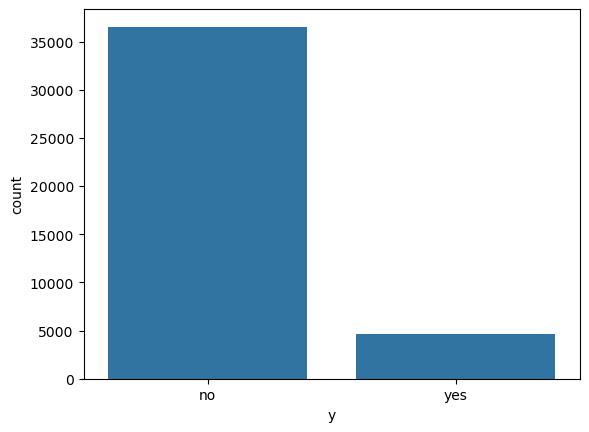

In [43]:
# Checking the data balanced or not
sns.countplot(x=df.y)
plt.show()

#### Insights:
* Any of the data does not representing normal distributions.
* Each data representing the skewed distributions.
* From the count plot we can say that the data is not balanced.

#### Bivariate Analysis

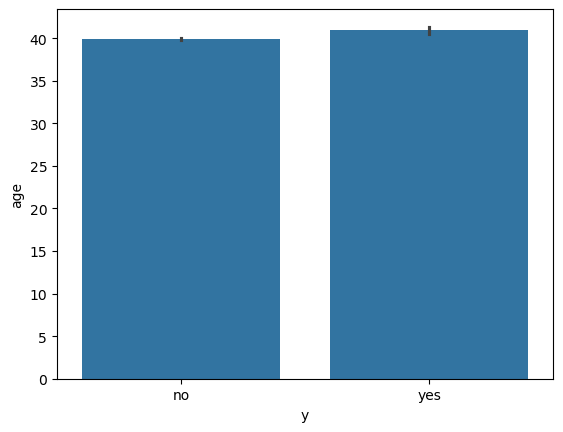

In [46]:
# Analysing the relation between the age and target variable.
sns.barplot(x=df.y,y=df.age)
plt.show()

#### Insights:
* The average age of customers who subscribed is slightly higher than those who did not.
* The difference in mean age between yes and no is not very large, but noticeable.

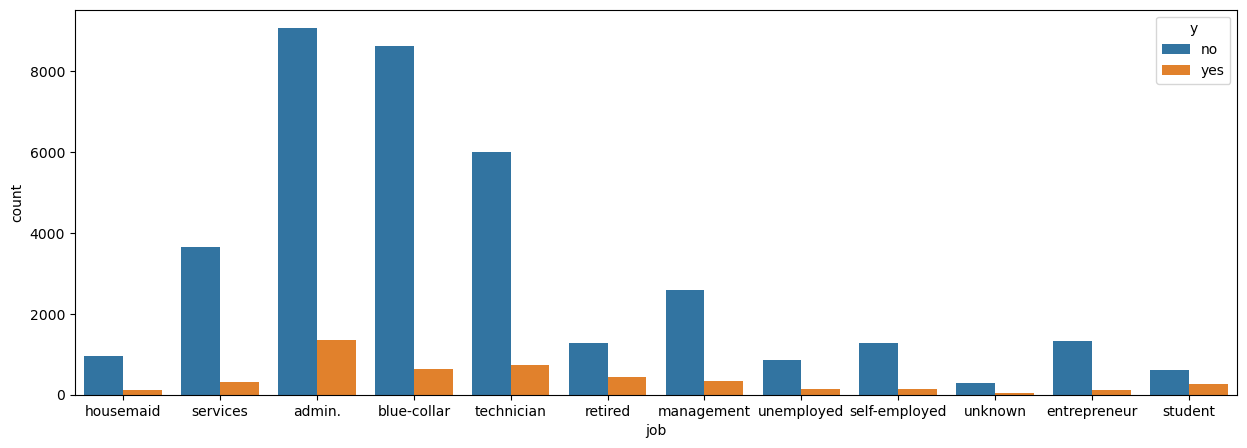

In [48]:
# Analysing the relation between job and target variable y
plt.figure(figsize=(15,5))
sns.countplot(x=df.job,hue=df.y)
plt.show()

#### Insights:
* Rate of subscription for term deposits varying across the job types.
* Retired, student, and unemployed customers have a higher proportion of subscription.
* Blue-collar and services jobs show very low subscription rates, despite having a large number of customers.
* Management and technician jobs have moderate number of subscription.

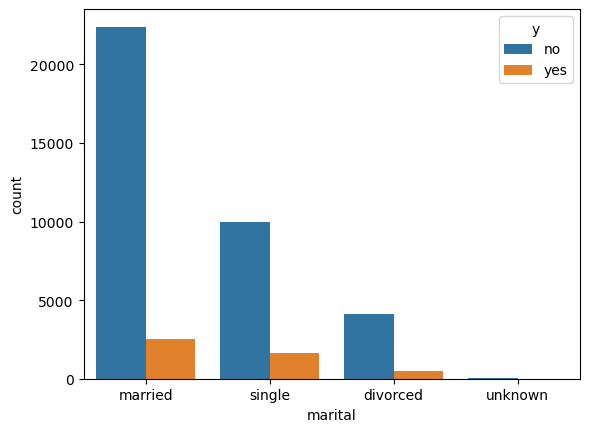

In [50]:
# Analysing the relation between marital status and target variable y
sns.countplot(x=df.marital,hue=df.y)
plt.show()

#### Insights:
* Most customers are married, followed by single and then divorced.
* Single cutomers have the highest proportion of subscriptions.
* Married customers show a lower subscription rate, despite being the largest group.
* Divorced customers have a lower overall count and also show a relatively low subscription rate.

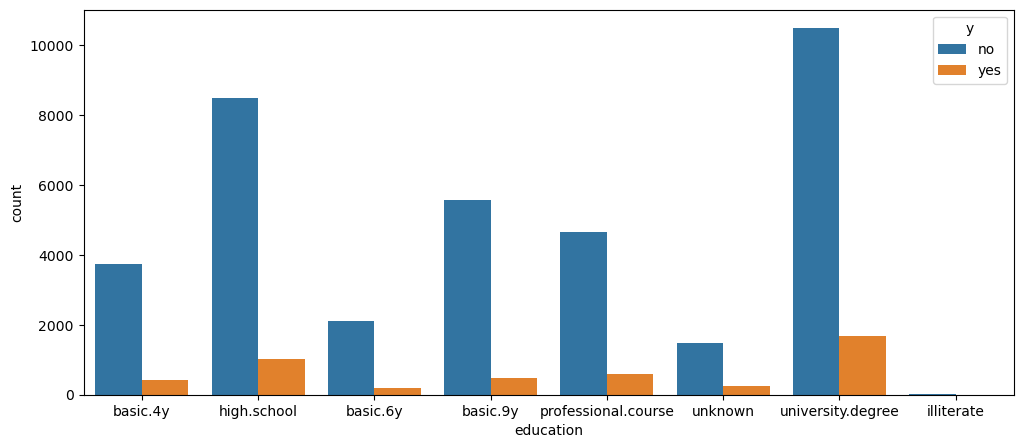

In [52]:
# Analysing the realtion between education and target variable y
plt.figure(figsize=(12,5))
sns.countplot(x=df.education,hue=df.y)
plt.show()

#### Insights:
* University degree holders are the largest group in the dataset, but their subscription rate is not very high.
* Professional course and high school educated customers show comparatively better subscription rate.
* Basic education levels (4y, 6y, 9y) have lower subscription rates and are mostly dominated by 'no' responses.
* Education level may influence subscription behavior, with those having professional or high school education showing slightly better engagement.

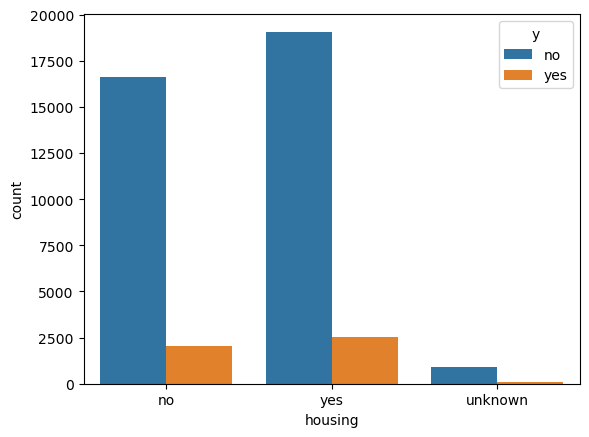

In [54]:
# Analysing the relation between housing losn and target variable y
sns.countplot(x=df.housing,hue=df.y)
plt.show()

#### Insights:
* Most customers have a housing loan and the majority of them have not subscribed to the term deposit.
* Among customers without a housing loan, a slightly higher proportion have subscribed.
* Customers without housing loans seem slightly more likely to subscribe to term deposit than those with housing loans.
* The housing loan status may influence the term deposit subscription.

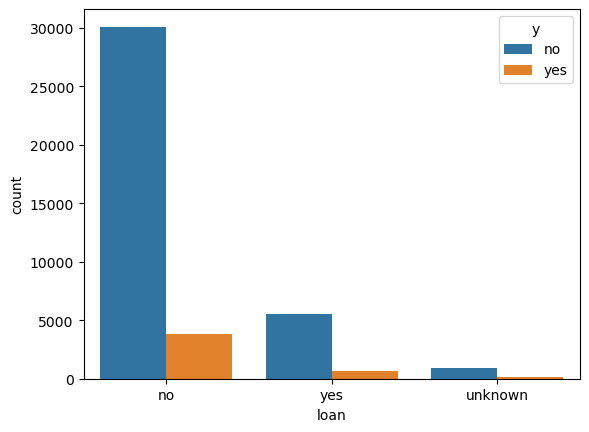

In [56]:
# Analysing the relation between personal loan and the target variable y
sns.countplot(x=df.loan,hue=df.y)
plt.show()

#### Insights:
* Majority of customers do not have a personal loan.
* The number of subscribers is higher among customers without a personal loan compared to those with a loan.
* Customers who already have a loan are less likely to subscribe to the term deposit.

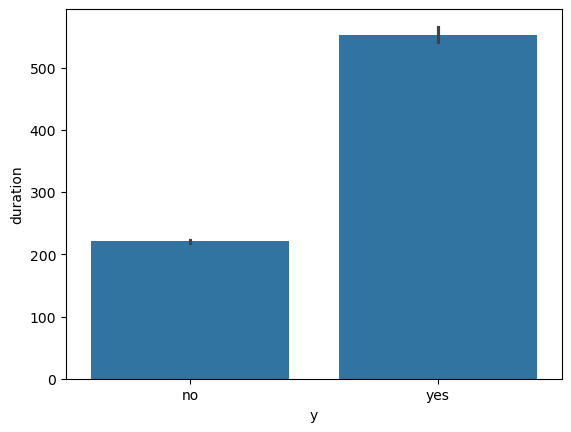

In [58]:
# Analysing the relation between duration and the target variable y
sns.barplot(x=df.y,y=df.duration)
plt.show()

#### Insights:
* Customers whosubscribe to a term deposit tend to have longer interaction duration than those who don't.
* This suggests that longer interactions might be a good indicator of potential interest in a term deposit.
* If the interaction lasts longer than a certain point, the customer might be more likely to subscribe term deposit.

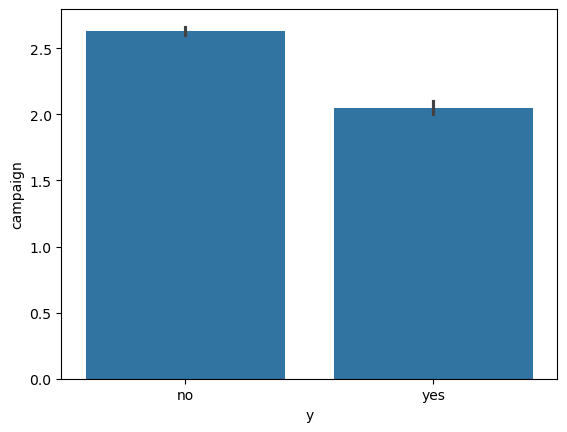

In [60]:
# Analysing the relation between the campaign and targeet variable y
sns.barplot(x=df.y,y=df.campaign)
plt.show()

#### Insights:
* This plot shows a slight difference in the number of campaigns that resulted in a subscription versus those that didn't.
* More campaign did not lead to subscription.

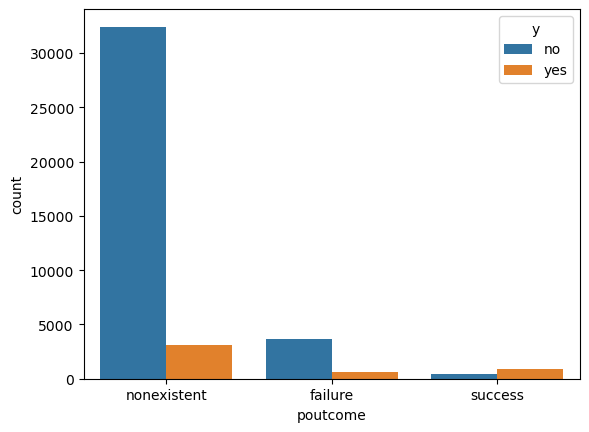

In [62]:
# Analysing the relation between poutcome and target variable y
sns.countplot(x=df.poutcome,hue=df.y)
plt.show()

#### Insights:
* The nonexistent category dominates the dataset.
* The success category has the lowest count.
* The failure category has count between the other two.

# 4 . Data Preprocessing

In [65]:
#Finding the missing values.
missing_values = df.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Insights:
* No missing values are found.
* The given data is clear and completely filled.

In [67]:
# Checking for duplicates
df.duplicated().sum()

12

In [68]:
df[df.duplicated()]   # duplicated rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [69]:
df=df.drop_duplicates()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [70]:
df.duplicated().sum()     # Now the data contain no duplicates

0

In [71]:
# Encoding

In [72]:
#Converting the categorical values to numerical values.
encoder = LabelEncoder()

In [73]:
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
for column in categorical_columns:
    df[column]=encoder.fit_transform(df[column])

In [74]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


#### Insights:
* No missing values are found.
* The given data is clear and completely filled.

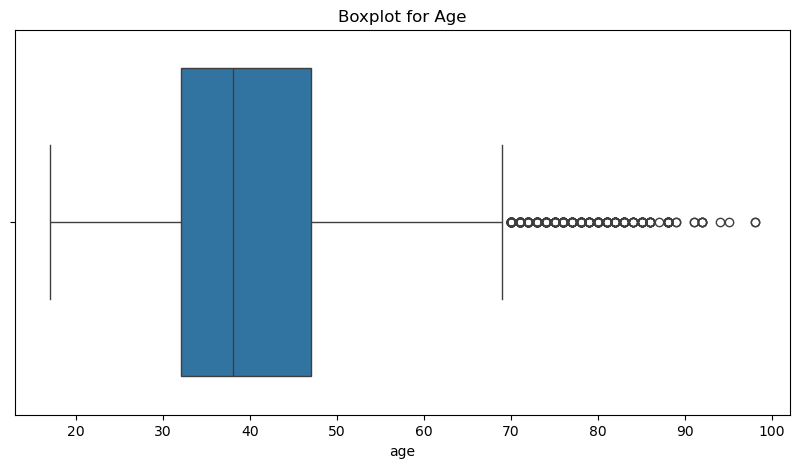

In [76]:
#Handling Outliers.
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.age)
plt.title('Boxplot for Age')
plt.show()

In [77]:
Q1 = df['age'].quantile(0.25)
Q1

32.0

In [78]:
Q3 = df['age'].quantile(0.75)
Q3

47.0

In [79]:
IQR = Q3-Q1
IQR

15.0

In [80]:
lower_bound = Q1-(1.5*IQR)
lower_bound

9.5

In [81]:
upper_bound = Q3+(1.5*IQR)
upper_bound

69.5

In [82]:
df.loc[df['age']<lower_bound]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [83]:
df.loc[df['age']>upper_bound]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,70,5,0,0,0,2,0,0,5,1,...,3,999,0,1,-1.8,92.843,-50.0,1.811,5099.1,1
27757,76,5,1,6,0,0,2,0,5,2,...,9,999,0,1,-1.8,92.843,-50.0,1.757,5099.1,0
27780,73,5,1,6,0,2,0,0,5,3,...,1,999,1,0,-1.8,92.843,-50.0,1.687,5099.1,0
27800,88,5,0,0,0,2,0,0,5,4,...,1,999,0,1,-1.8,92.843,-50.0,1.663,5099.1,0
27802,88,5,0,0,0,0,0,0,5,4,...,2,999,0,1,-1.8,92.843,-50.0,1.663,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,5,0,0,1,2,2,0,8,1,...,4,3,1,2,-1.1,94.601,-49.5,1.000,4963.6,0
40996,81,5,1,0,0,2,0,0,8,4,...,1,999,2,0,-1.1,94.601,-49.5,1.016,4963.6,1
41004,80,5,1,5,0,2,0,0,8,2,...,1,999,1,0,-1.1,94.601,-49.5,1.025,4963.6,1
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [84]:
len(df.loc[df['age']>upper_bound])/len(df)*100

1.1365844181076354

In [85]:
df.loc[df['age']>upper_bound,'age']=df['age'].median()

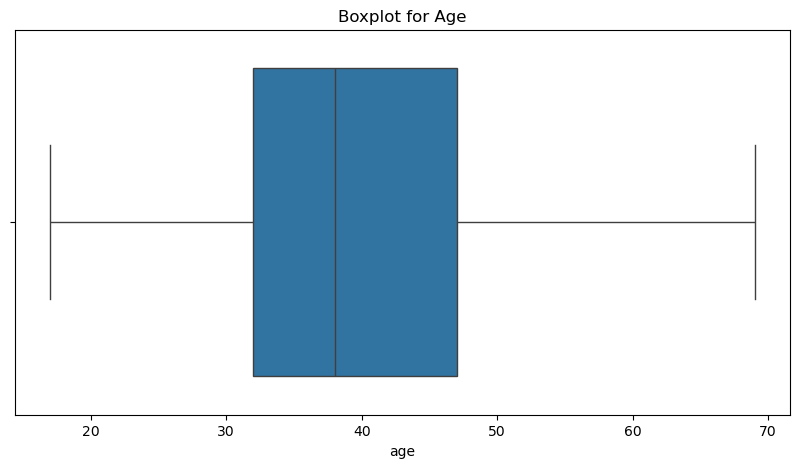

In [86]:
#Outliers handled.
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.age)
plt.title('Boxplot for Age')
plt.show()

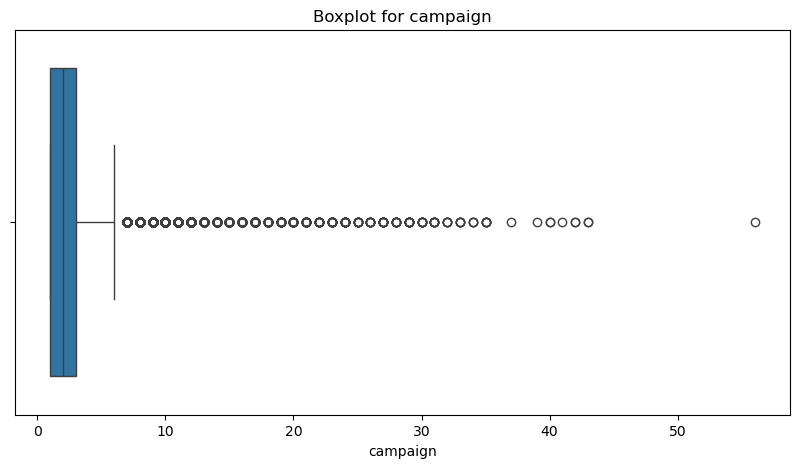

In [87]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.campaign)
plt.title('Boxplot for campaign')
plt.show()

In [88]:
Q1=df['campaign'].quantile(0.25)
Q1

1.0

In [89]:
Q3=df['campaign'].quantile(0.75)
Q3

3.0

In [90]:
IQR=Q3-Q1
IQR

2.0

In [91]:
lower_bound=Q1-(1.5*IQR)
lower_bound

-2.0

In [92]:
upper_bound=Q3+(1.5*IQR)
upper_bound

6.0

In [93]:
df.loc[df['campaign']<lower_bound]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [94]:
df.loc[df['campaign']>upper_bound]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
887,54,0,1,6,0,0,0,1,6,4,...,7,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1043,41,9,2,6,1,0,0,1,6,4,...,8,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1094,40,9,1,5,0,2,0,1,6,4,...,8,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1097,51,1,1,0,1,2,0,1,6,4,...,7,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
1230,48,1,0,0,0,0,0,1,6,2,...,7,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,38,5,1,2,0,0,0,1,9,0,...,9,999,1,0,-1.1,94.199,-37.5,0.883,4963.6,0
40631,38,5,1,0,0,2,0,0,9,1,...,7,999,0,1,-1.1,94.199,-37.5,0.882,4963.6,0
40698,29,9,2,5,0,2,0,0,9,1,...,7,3,5,2,-1.1,94.199,-37.5,0.879,4963.6,0
40821,33,9,2,5,0,2,0,0,9,0,...,9,999,2,0,-1.1,94.199,-37.5,0.879,4963.6,0


In [95]:
len(df.loc[df['campaign']>upper_bound])/len(df)*100

5.8432096366815625

In [96]:
df.loc[df['campaign']>upper_bound,'campaign']=df['campaign'].median()

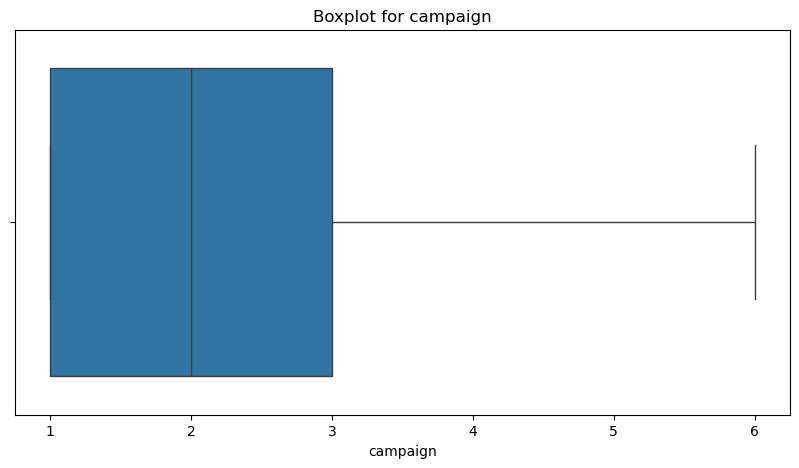

In [97]:
#Outliers Handled.
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.campaign)
plt.title('Boxplot for campaign')
plt.show()

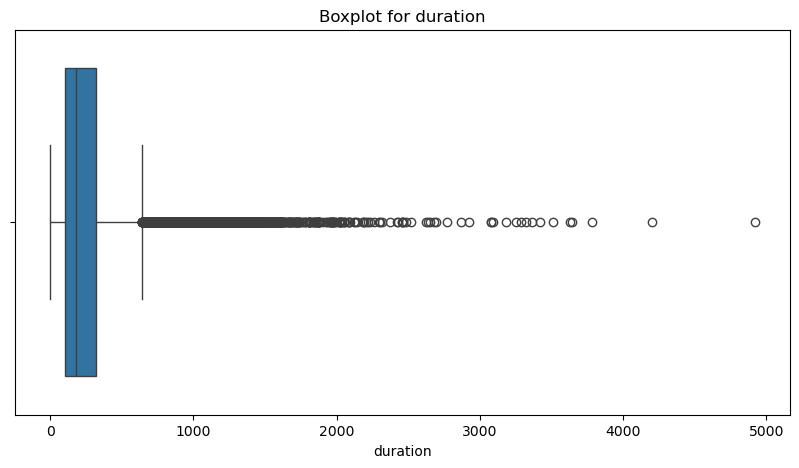

In [98]:
#Outliers Handling.
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.duration)
plt.title('Boxplot for duration')
plt.show()

In [99]:
Q1=df['duration'].quantile(0.25)
Q1

102.0

In [100]:
Q3=df['duration'].quantile(0.75)
Q3

319.0

In [101]:
IQR=Q3-Q1
IQR

217.0

In [102]:
lower_bound=Q1-(1.5*IQR)
lower_bound

-223.5

In [103]:
upper_bound=Q3+(1.5*IQR)
upper_bound

644.5

In [104]:
df.loc[df['duration']<lower_bound]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [105]:
df.loc[df['duration']>upper_bound]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37,52,9,1,2,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
57,45,7,1,3,1,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
61,51,1,1,2,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
75,41,1,0,0,1,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
83,49,2,1,6,1,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,9,2,5,0,2,0,0,7,0,...,2,19,1,2,-1.1,94.767,-50.8,1.040,4963.6,1
41153,67,3,0,5,0,2,0,0,7,1,...,2,5,5,2,-1.1,94.767,-50.8,1.039,4963.6,1
41160,33,0,1,6,0,0,0,0,7,3,...,1,999,0,1,-1.1,94.767,-50.8,1.035,4963.6,1
41164,54,0,1,5,0,0,0,0,7,3,...,2,10,1,2,-1.1,94.767,-50.8,1.035,4963.6,1


In [106]:
len(df.loc[df['duration']>upper_bound])/len(df)*100

7.195939382164368

In [107]:
df.loc[df['duration']>upper_bound,'duration']=df['duration'].median()

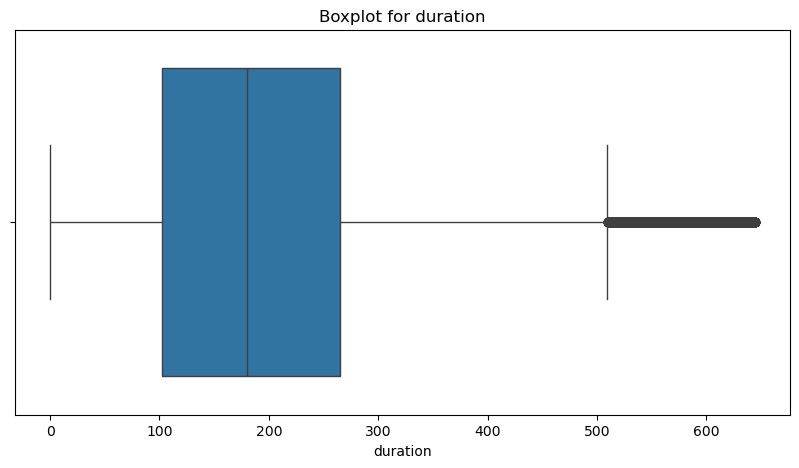

In [108]:
#Outliers Handled.
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.duration)
plt.title('Boxplot for duration')
plt.show()

In [109]:
# Balancing data using SMOTE

In [110]:
# Creating independent and dependent variable
x=df.iloc[:,:-1]
y=df.y

In [111]:
# Splitting the data into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [112]:
smote=SMOTE()     # Initialising smote

In [113]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [168]:
y.value_counts(normalize=True)  # Shows class imbalance

y
0    0.887337
1    0.112663
Name: proportion, dtype: float64

In [114]:
len(y_train)

32940

In [115]:
len(y_train_smote)

58544

In [172]:
df.shape

(41176, 21)

In [116]:
from collections import Counter

In [117]:
print('Actual classes ',Counter(y_train))
print('Smote classes ',Counter(y_train_smote))

Actual classes  Counter({0: 29272, 1: 3668})
Smote classes  Counter({0: 29272, 1: 29272})


# 5 . Feature selection 

### Finding the Correlation

In [120]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numerical_cols] # The correlation matrix works only with numerical columns

In [121]:
corr_matrix = df_numeric.corr() # Compute the Correlation Matrix

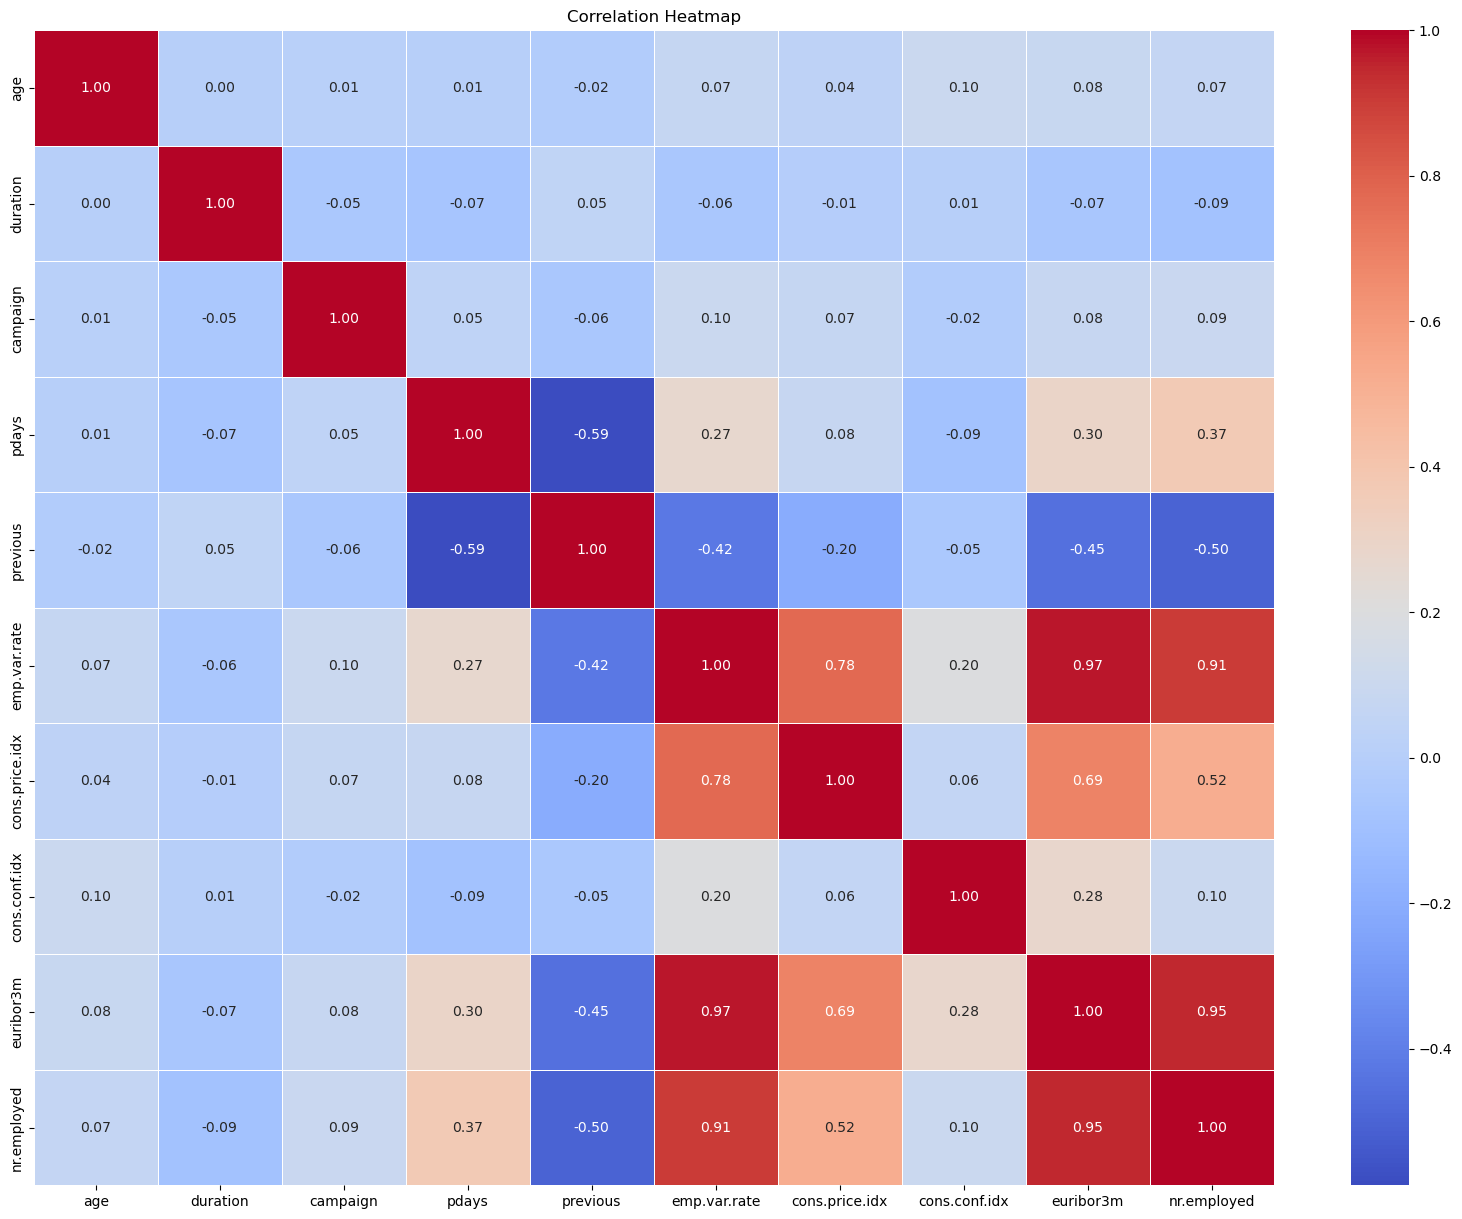

In [122]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [123]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [124]:
df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.013276,-0.388142,-0.096353,0.190914,-0.003958,-0.007726,0.032989,-0.030454,-0.020661,...,0.010061,0.006086,-0.021825,0.016569,0.070892,0.036791,0.100817,0.083740,0.067970,-0.020295
job,-0.013276,1.000000,0.027829,0.134159,-0.028282,0.006873,-0.010161,-0.025054,-0.033007,-0.000868,...,-0.009141,-0.028494,0.021007,0.011485,-0.008443,-0.016122,0.052802,-0.008024,-0.019728,0.025248
marital,-0.388142,0.027829,1.000000,0.109195,-0.079432,0.010499,0.005806,-0.054527,-0.007622,0.002174,...,-0.010207,-0.037955,0.038708,0.001905,-0.084142,-0.057431,-0.033821,-0.091881,-0.086134,0.046249
education,-0.096353,0.134159,0.109195,1.000000,-0.186811,0.016891,0.006441,-0.105722,-0.082739,-0.017989,...,-0.001848,-0.046656,0.038880,0.016987,-0.043695,-0.081499,0.078789,-0.036321,-0.041455,0.057776
default,0.190914,-0.028282,-0.079432,-0.186811,1.000000,-0.015790,-0.003823,0.135275,-0.015787,-0.008660,...,0.026525,0.080086,-0.102458,0.023437,0.203257,0.168076,0.026502,0.195335,0.189846,-0.099364
housing,-0.003958,0.006873,0.010499,0.016891,-0.015790,1.000000,0.044272,-0.082098,-0.018050,0.003339,...,-0.007864,-0.010539,0.021293,-0.011771,-0.060248,-0.080579,-0.033665,-0.059283,-0.045892,0.011613
loan,-0.007726,-0.010161,0.005806,0.006441,-0.003823,0.044272,1.000000,-0.008589,-0.005738,-0.009345,...,0.013370,0.000371,-0.001374,-0.001486,0.001840,-0.002474,-0.012002,0.000125,0.003910,-0.004922
contact,0.032989,-0.025054,-0.054527,-0.105722,0.135275,-0.082098,-0.008589,1.000000,0.276499,-0.009614,...,0.043604,0.117999,-0.212903,0.118773,0.393730,0.591596,0.251575,0.399892,0.269285,-0.144774
month,-0.030454,-0.033007,-0.007622,-0.082739,-0.015787,-0.018050,-0.005738,0.276499,1.000000,0.027683,...,-0.041280,-0.047885,0.103151,-0.065010,-0.178724,-0.004183,0.009551,-0.117216,-0.221370,-0.006051
day_of_week,-0.020661,-0.000868,0.002174,-0.017989,-0.008660,0.003339,-0.009345,-0.009614,0.027683,1.000000,...,-0.051579,-0.009531,-0.004103,0.018733,0.033288,0.005674,0.041405,0.039064,0.028414,0.015970


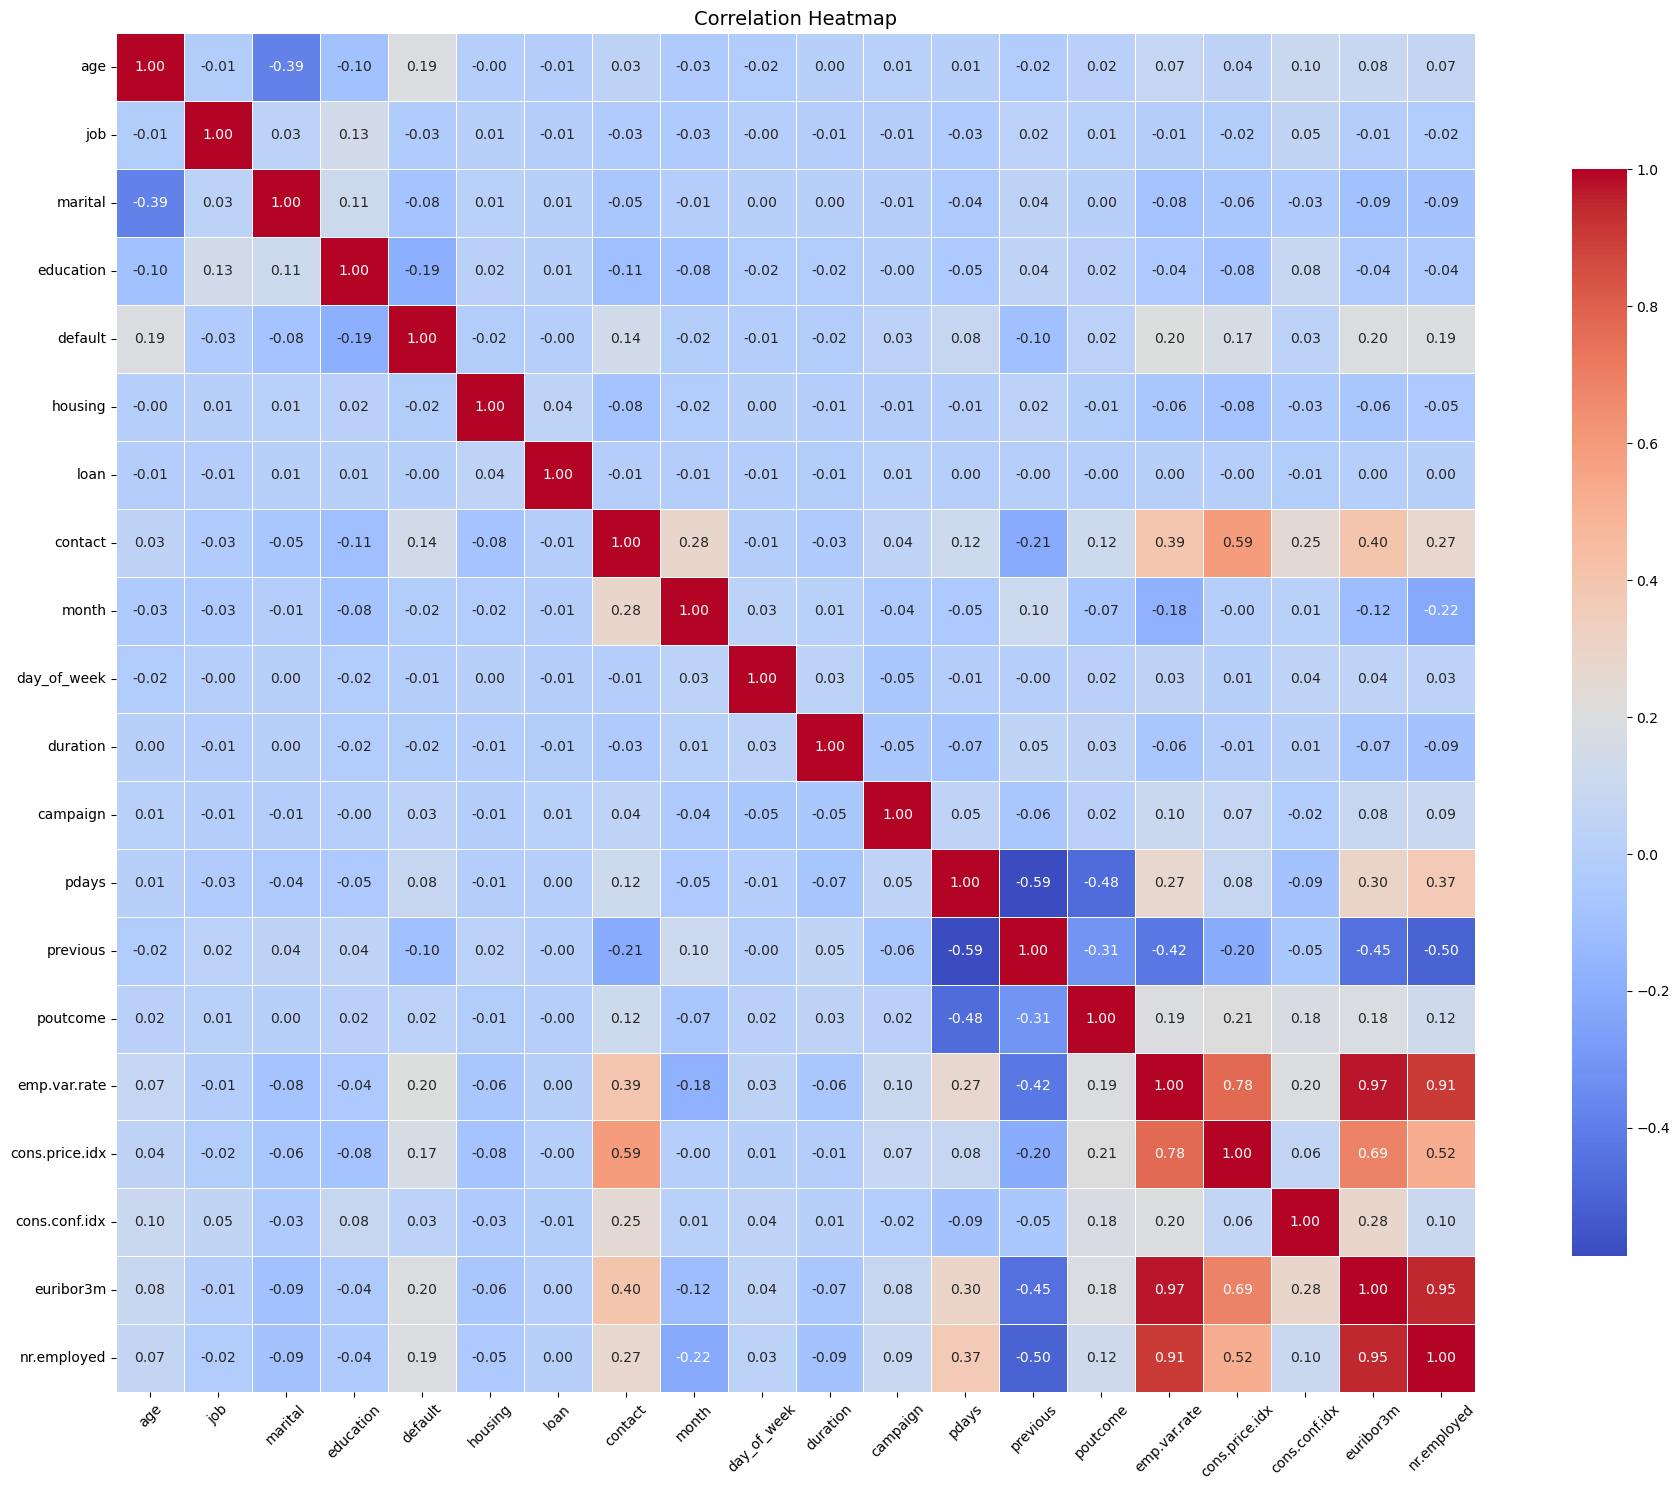

In [125]:
plt.figure(figsize=(20, 15))  # Adjust the figure size (width, height)
sns.heatmap(df.drop('y', axis=1).corr(), 
            annot=True,          # Show correlation values
            fmt=".2f",           # Format float to 2 decimal places
            cmap="coolwarm",     # Use a clearer color map
            square=True,         # Make each cell square-shaped
            linewidths=0.5,      # Add lines between boxes
            cbar_kws={"shrink": .8})  # Shrink color bar for clarity

plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

## Insights : 
 1. After the heatmap age,campaign,duration,previous has very low correlation.

 2. emp.var.rate, euribor3m, and nr.employed are all strongly correlated
 
 3. Correlation ≈ +0.97 = emp.var.rate and euribor3m are strong positive correlations.
 * emp.var.rate = Quarterly employment variation rate(quarterly indicator of job market health).
 * euribor3m = Daily 3-month Euribor interest rate which is the rate at which eurozone banks lend money to each other. 
 Reflects overall economic policy and central bank decisions.
When the job market improves (higher emp.var.rate) it often signals an expanding economy.
increase : Employment rate ⟶  Euribor rate

4.Correlation ≈ +0.95 =euribor3m and nr.employed are strong positive correlations
* euribor3m = 3-month Euribor interest rate.
* nr.employed = number of employees - quarterly indicator figure/economy wide.
* Both are economic health indicators.
When more people are employed, the economy is stronger, with higher demand, and possibly higher inflation. respond the central bank may raise interest rates — so Euribor also rises. increase : Number of employed ⟶ Euribor rate

5. emp.var.rate and nr.employed -> Moderate -> Employment variation leads to more people working -> so Acceptable together.

# 6 . Model Creation

### Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [130]:
y_predict=LR.predict(x_test)
y_predict

array([1, 1, 0, ..., 0, 0, 0])

In [131]:
y_test

36264    1
32672    0
40872    1
32907    0
16464    0
        ..
19004    0
34252    0
13575    0
1872     0
12339    0
Name: y, Length: 8236, dtype: int32

In [132]:
from sklearn.metrics import classification_report,recall_score,precision_score,accuracy_score,f1_score,confusion_matrix

In [133]:
confusion_matrix=confusion_matrix(y_test,y_predict)
confusion_matrix

array([[5748, 1517],
       [ 311,  660]], dtype=int64)

In [134]:
recall=recall_score(y_test,y_predict)
recall

0.6797116374871267

In [135]:
precision=precision_score(y_test,y_predict)
precision

0.3031694993109784

In [136]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.4193138500635324

In [137]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.7780475959203497

In [138]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7265
           1       0.30      0.68      0.42       971

    accuracy                           0.78      8236
   macro avg       0.63      0.74      0.64      8236
weighted avg       0.87      0.78      0.81      8236



### K Nearest Neighbors (KNN)

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
# Finding optimal value for k to determine how many nearest neighbors to find

In [150]:
error_rate=[]
for i in range (1,11):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train_smote,y_train_smote)
    y_pred_i=KNN.predict(x_test)
    error_rate.append(np.mean(y_pred_i!=y_test))

In [151]:
error_rate

[0.14035939776590578,
 0.13088878096163187,
 0.1515298688683827,
 0.14181641573579407,
 0.16172899465760077,
 0.1538368139873725,
 0.16792132102962604,
 0.15978630403108304,
 0.17010684798445846,
 0.16355026711996115]

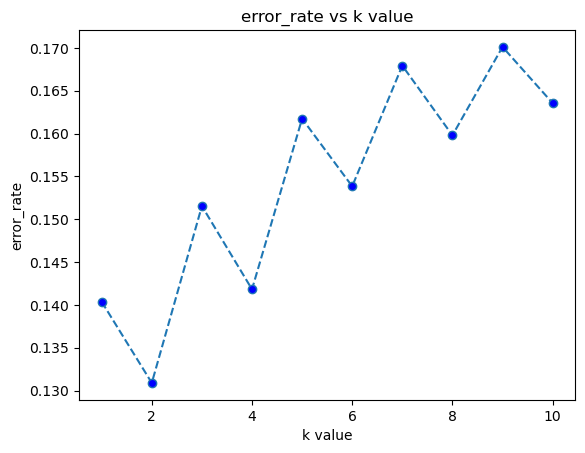

In [144]:
# Let's plot k value and error rate
plt.plot(range(1,11),error_rate,linestyle='dashed',marker='o',markerfacecolor='blue')
plt.title('error_rate vs k value')
plt.xlabel('k value')
plt.ylabel('error_rate')
plt.show()

In [145]:
# Let's fit the data into KNN model
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_smote,y_train_smote)

KNeighborsClassifier(n_neighbors=7)

In [146]:
y_predict=knn.predict(x_test)
y_predict

array([1, 0, 1, ..., 0, 0, 0])

In [154]:
from sklearn.metrics import classification_report,recall_score,precision_score,accuracy_score,f1_score,confusion_matrix

In [156]:
confusion_matrix=confusion_matrix(y_test,y_predict)
confusion_matrix

array([[6072, 1193],
       [ 190,  781]], dtype=int64)

In [158]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.832078678970374

In [160]:
recall=recall_score(y_test,y_predict)
recall

0.8043254376930999

In [162]:
precision=precision_score(y_test,y_predict)
precision

0.3956433637284701

In [164]:
f1_score=f1_score(y_test,y_predict)
f1_score

0.5303904923599321

In [166]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7265
           1       0.40      0.80      0.53       971

    accuracy                           0.83      8236
   macro avg       0.68      0.82      0.71      8236
weighted avg       0.90      0.83      0.85      8236



### Supprt Vector Machine

In [ ]:
from sklearn.svm import SVC
svclassifier=SVC()
svclassifier.fit(x_train_smote,y_train_smote)

In [ ]:
y_predict=svclassifier.predict(x_test)
y_predict

In [ ]:
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_predict))

In [ ]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

In [ ]:
recall=recall_score(y_test,y_predict)
recall

In [ ]:
precision=precision_score(y_test,y_predict)
precision

In [ ]:
f1_score=f1_score(y_test,y_predict)
f1_score

In [ ]:
print(classification_report(y_test,y_predict))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train_smote,y_train_smote)

In [ ]:
y_predict=DT.predict(x_test)
y_predict

In [ ]:
print(confusion_matrix(y_test,y_predict))

In [ ]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

In [ ]:
f1_score=f1_score(y_test,y_predict)
f1_score

In [ ]:
recall=recall_score(y_test,y_predict)
recall

In [ ]:
precision=precision_score(y_test,y_predict)
precision

In [ ]:
print(classification_report(y_test,y_predict))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train_smote,y_train_smote)

In [1]:
y_predict=RFC.predict(x_test)
y_predict

NameError: name 'RFC' is not defined

In [ ]:
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_predict))

In [ ]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

In [ ]:
f1_score=f1_score(y_test,y_predict)
f1_score

In [ ]:
recall=recall_score(y_test,y_predict)
recall

In [ ]:
precision=precision_score(y_test,y_predict)
precision

In [ ]:
print(classification_report(y_test,y_predict))

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train_smote,y_train_smote)

In [ ]:
y_predict=GBC.predict(x_test)
y_predict

In [ ]:
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_predict))

In [ ]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

In [ ]:
f1_score=f1_score(y_test,y_predict)
f1_score

In [ ]:
recall=recall_score(y_test,y_predict)
recall

In [ ]:
precision=precision_score(y_test,y_predict)
precision

In [ ]:
print(classification_report(y_test,y_predict))

### XG Boost

In [ ]:
!pip install xgboost      

In [ ]:
from xgboost import XGBClassifier
XGBC=XGBClassifier()
XGBC.fit(x_train_smote,y_train_smote)

In [ ]:
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,confusion_matrix

In [ ]:
y_predict=XGBC.predict(x_test)
y_predict

In [ ]:
print(confusion_matrix(y_test,y_predict))

In [ ]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

In [ ]:
f1_score=f1_score(y_test,y_predict)
f1_score

In [ ]:
recall=recall_score(y_test,y_predict)
recall

In [ ]:
precision=precision_score(y_test,y_predict)
precision

In [ ]:
print(classification_report(y_test,y_predict))

# Model Comparison Report
 Among all tested models:
* XGBoost and Random Forest performed the best in terms of accuracy and F1-score.
* Logistic Regression was helpful for interpretability, but slightly underperformed.

## Challenges Faced:
* Class Imbalance: The target variable (y) was highly imbalanced (many more “no”s than “yes”es). Solved using SMOTE and balanced class weights.

* High Correlation of Duration: duration was highly predictive but not usable for realistic predictions. Excluded from the final model.

* Categorical Variables: Complex categorical variables (like job, education) required one-hot encoding, increasing dimensionality. Handled with feature selection and dimensionality reduction.

* Interpretability vs Accuracy: Balancing interpretability (Logistic Regression) with performance (XGBoost) was necessary for practical deployment.



## Suggestions for Bank Marketing Team
1.Target Profiles:
* Prioritize clients aged 30–60, especially students, retirees, and entrepreneurs.
* Focus on individuals with higher education levels.

2.Contact Strategy:
* Use cellular as the primary contact method.
* Implement smart calling strategies — avoid excessively short or long calls unless early interest is shown.

3.Timing of Campaigns:
* Schedule campaigns in March, October, and December.
* Reduce outreach volume in May unless other indicators are favorable.

4.Monitor Economic Trends:
* Run promotions more actively during low euribor3m rates and high consumer confidence periods.
